In [45]:
import pandas as pd
import numpy as np
import gc
import os
import pickle
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
with open('clean_data_pickle','rb') as f:
    data = pickle.load(f)

In [3]:
data.head()

,points,price,year,wine_nlp,flavor_nlp,fruit_nlp,finish_nlp,aroma_nlp,palat_nlp,acid_nlp,...,ex_title3_Wachau,ex_title3_Wahluke Slope,ex_title3_Washington,ex_title3_Western Cape,ex_title3_Willamette Valley,ex_title3_Yakima Valley,ex_title3_other,ex_title3_nan,designation_other,designation_nan
0,87,15.0,2011.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,87,14.0,2013.0,1,2,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,87,13.0,2013.0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
3,87,65.0,2012.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,87,15.0,2011.0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [17]:
data.columns[2700]

'winery_Wakefield'

In [14]:
data[['points','price','year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120975 entries, 0 to 120974
Data columns (total 3 columns):
points    120975 non-null int64
price     120975 non-null float64
year      116816 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.8 MB


In [15]:
data['year'].fillna(data['year'].mean(),inplace=True)

In [16]:
Y=data['price']
X=data.drop('price',axis=1)

In [4]:
with open('pca_500_x_pd','rb') as f:
    X = pickle.load(f)


In [5]:
with open('pca_y_pd','rb') as f:
    Y = pickle.load(f)


In [6]:
print(X.shape)
print(Y.shape)

(120975, 500)
(120975,)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
dt_reg=DecisionTreeRegressor(max_depth=30,max_features=50)

In [33]:
dt_reg.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=50,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
y_pred = dt_reg.predict(X_test)
print("Score: "+str(dt_reg.score(X_test,Y_test)))
print("Score for Train: "+str(dt_reg.score(X_train,Y_train)))

Score: -0.6143573721764752
Score for Train: 0.965223188421639


In [35]:
gc.collect()

7

In [66]:
rf_reg = RandomForestRegressor(max_depth=50,max_features=100,n_estimators=30,verbose=2)

In [67]:
rf_reg.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 30


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s


building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.6min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=100, max_leaf_nodes=1000,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [68]:
Y_pred = rf_reg.predict(X_test)
print("Score: "+str(rf_reg.score(X_test,Y_test)))
print("Score for Train: "+str(rf_reg.score(X_train,Y_train)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(Y_test,Y_pred))))
print("MAPE: "+str(mean_absolute_percentage_error(Y_test,Y_pred)))
print("R2: "+str(metrics.r2_score(Y_test,Y_pred)))
print("MAE: "+str(metrics.mean_absolute_error(Y_test,Y_pred)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Score: 0.42920096985536543
Score for Train: 0.8365994461786193
RMS: 29.050122262155245
MAPE: 42.119624733119124
R2: 0.4292009698553655
MAE: 12.795948103605777


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


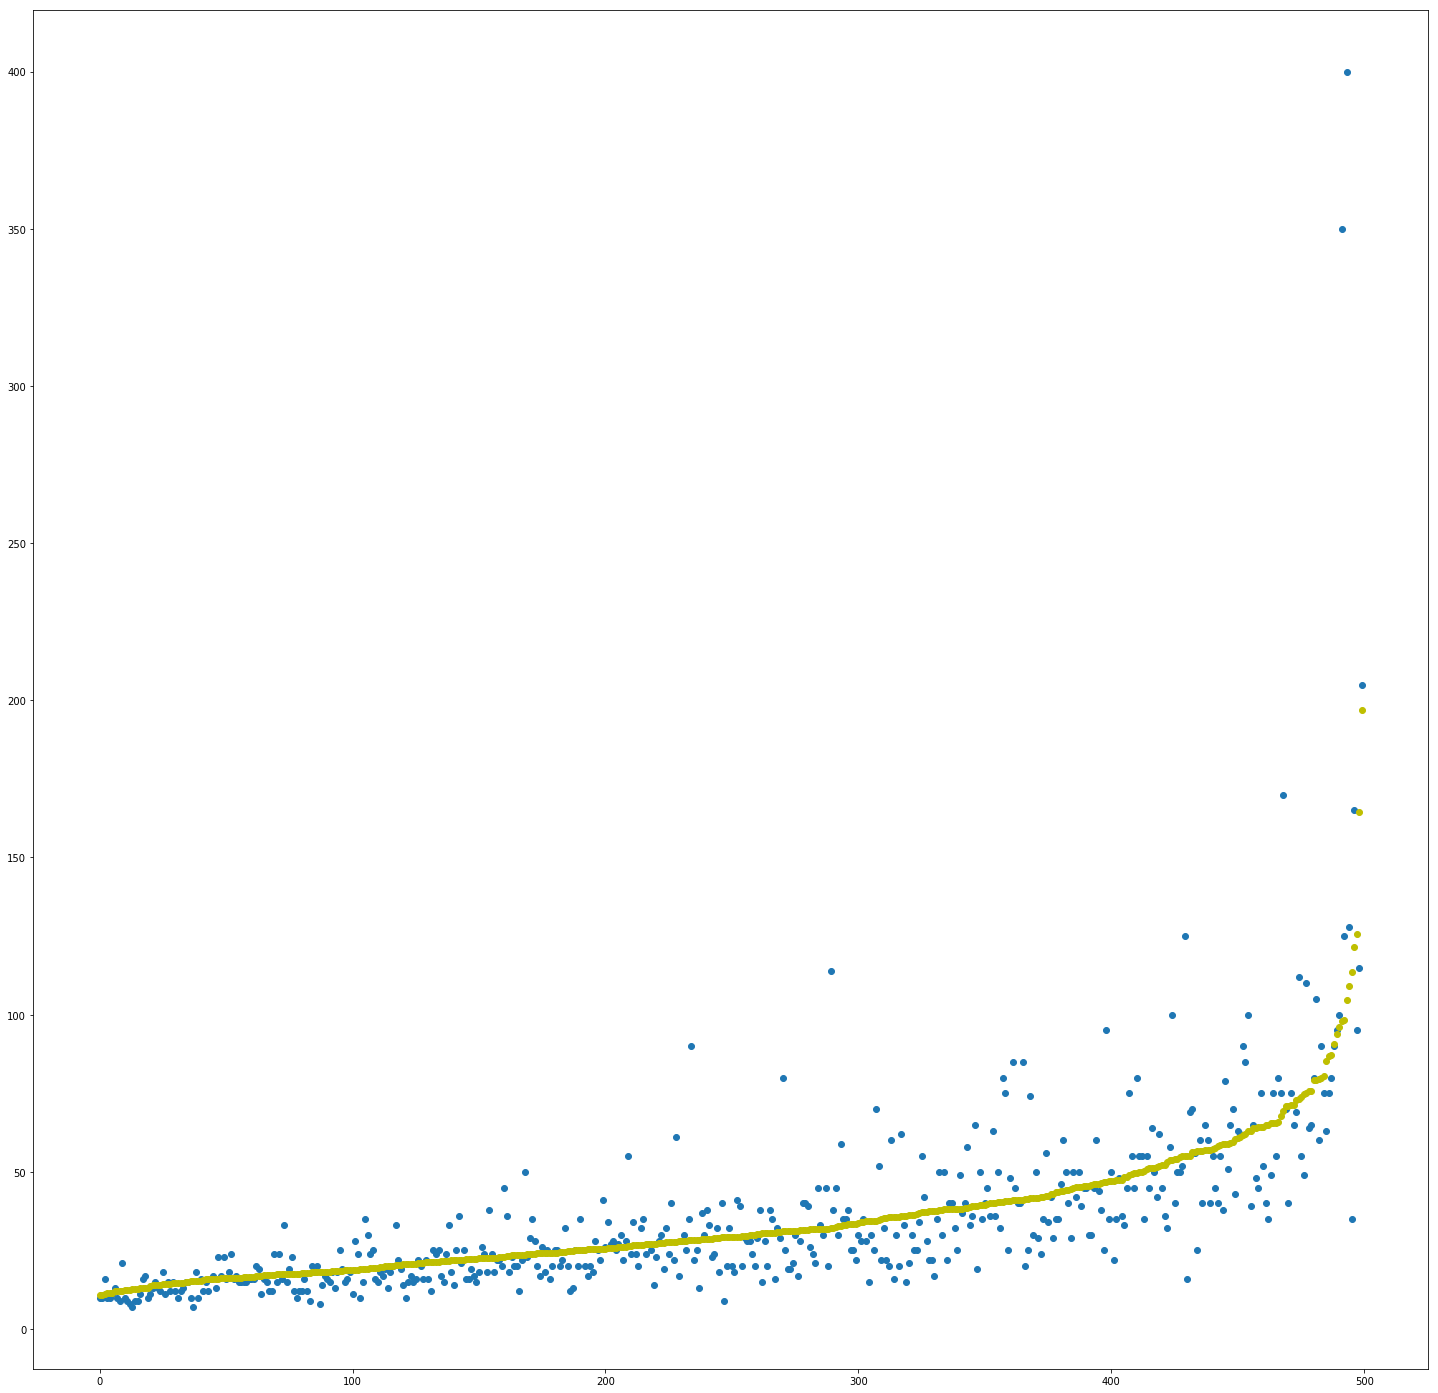

In [131]:
point=500
plt.figure(figsize=(25,25))
pre_fig=pd.DataFrame(np.array([Y_test[:point].values,y_pred[:point]]).T,columns=['Test','Predict'])
pre_fig=pre_fig.sort_values(by='Predict')
pre_fig=pre_fig.reset_index(drop=True)
plt.scatter(pre_fig.index,pre_fig['Test'])
plt.scatter(pre_fig.index,pre_fig['Predict'],color='y')
plt.show()

In [51]:
gb_reg = GradientBoostingRegressor(max_depth=20,max_features=20,n_estimators=15,verbose=2,learning_rate=0.1)

In [52]:
gb_reg.fit(X_train,Y_train)

      Iter       Train Loss   Remaining Time 
         1        1503.6034            6.05m
         2        1256.5150            6.80m
         3        1059.6252            5.92m
         4         888.1107            5.69m
         5         762.1154            5.09m
         6         649.3598            4.81m
         7         550.2330            4.56m
         8         462.9545            4.27m
         9         395.1036            3.86m
        10         334.5084            3.45m
        11         284.5848            2.77m
        12         245.7341            2.07m
        13         210.0715            1.38m
        14         179.6556           41.60s
        15         154.4695            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=20, max_features=20,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=15, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=2, warm_start=False)

In [53]:
y_pred = gb_reg.predict(X_test)
print("Score: "+str(gb_reg.score(X_test,Y_test)))
print("Score for Train: "+str(gb_reg.score(X_train,Y_train)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(Y_test,Y_pred))))
print("MAPE: "+str(mean_absolute_percentage_error(Y_test,Y_pred)))
print("R2: "+str(metrics.r2_score(Y_test,Y_pred)))
print("MAE: "+str(metrics.mean_absolute_error(Y_test,Y_pred)))

Score: 0.33843386322790747
Score for Train: 0.9133864178492134


In [70]:
from sklearn.externals import joblib

In [71]:
joblib.dump(rf_reg,'model_randomforest_pca')

['model_randomforest_pca']

In [ ]:
def (list_):
    
    asdfasdf
    sdaf
    
    return priced